In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel('/content/Online Retail.xlsx')

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [6]:
df.shape

(541909, 8)

In [3]:
df.info()

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df = df[df['CustomerID'].notna()]

###Data is very huge so we will train and segment on a sample of the data

In [10]:
df_new = df.sample(10000, random_state = 10)
df_new.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
369174,569018,23508,MINI PLAYING CARDS DOLLY GIRL,20,2011-09-30 09:25:00,0.42,12676.0,Sweden
304746,563613,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2011-08-18 08:49:00,0.55,12688.0,Israel
485978,577696,21327,SKULLS WRITING SET,2,2011-11-21 11:57:00,1.65,16406.0,United Kingdom
436656,574228,22915,ASSORTED BOTTLE TOP MAGNETS,12,2011-11-03 12:18:00,0.42,16678.0,United Kingdom
517533,580062,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-12-01 13:28:00,2.95,15862.0,United Kingdom
76488,542627,84992,72 SWEETHEART FAIRY CAKE CASES,24,2011-01-31 09:51:00,0.55,14426.0,United Kingdom
5025,536837,22112,CHOCOLATE HOT WATER BOTTLE,7,2010-12-02 18:15:00,4.95,14395.0,United Kingdom
171642,551439,82486,WOOD S/3 CABINET ANT WHITE FINISH,2,2011-04-28 15:26:00,8.95,14758.0,United Kingdom
73944,542397,84378,SET OF 3 HEART COOKIE CUTTERS,24,2011-01-27 15:22:00,1.25,13328.0,United Kingdom
508768,579269,85034B,3 WHITE CHOC MORRIS BOXED CANDLES,24,2011-11-29 09:48:00,1.25,14601.0,United Kingdom


In [16]:
from datetime import datetime
df_new["InvoiceDate"] = df_new["InvoiceDate"].dt.date

In [17]:
df_new["Total"] = df_new["Quantity"] * df_new["UnitPrice"]

In [18]:
import datetime
snapshot_date = max(df_new.InvoiceDate) + datetime.timedelta(days=1)

In [19]:
customers = df_new.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total': 'sum'})

customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'Total': 'MonetaryValue'}, inplace=True)

In [20]:
customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,40,4,161.48
12349.0,19,2,36.90
12350.0,311,1,17.70
12352.0,81,1,16.80
12356.0,246,3,126.60


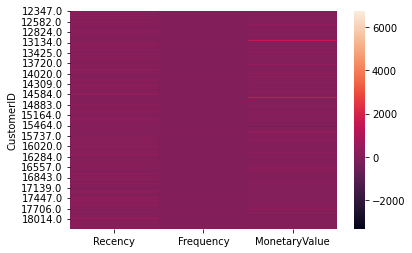

In [25]:
sns.heatmap(customers)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

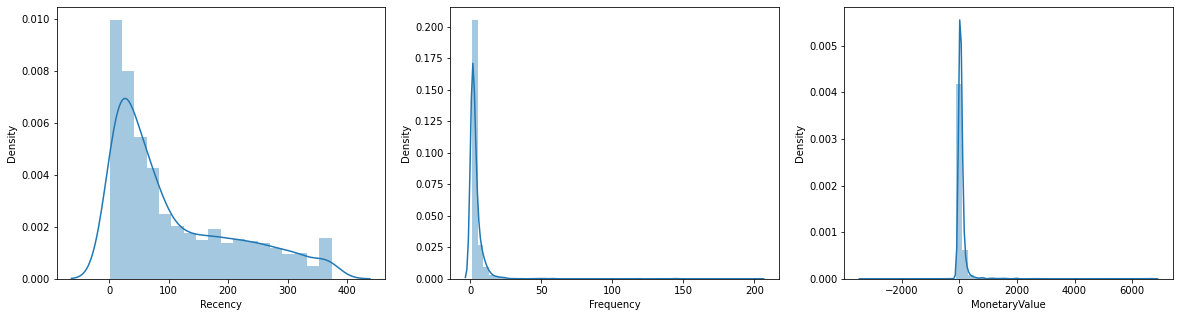

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
sns.distplot(customers['Recency'], ax=ax[0])
sns.distplot(customers['Frequency'], ax=ax[1])
sns.distplot(customers['MonetaryValue'], ax=ax[2])
plt.show()

In [32]:
from scipy import stats
customers_new = pd.DataFrame()
customers_new["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_new["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_new["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_new.head()

,Recency,Frequency,MonetaryValue
0,5.790304,1.030850,5.445523
1,4.200035,0.595304,3.329217
2,11.867798,0.000000,2.606100
3,7.568873,0.000000,2.561158
4,11.020456,0.866424,5.021243


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customers_new)
customers_normalized = scaler.transform(customers_new)
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))

[-0. -0. -0.]
[1. 1. 1.]


In [34]:
pd.DataFrame(customers_normalized).head()

,0,1,2
0,-0.436428,0.775899,1.186712
1,-0.944297,-0.044405,-0.007262
2,1.504485,-1.165595,-0.415229
3,0.131577,-1.165595,-0.440584
4,1.233877,0.466222,0.947343


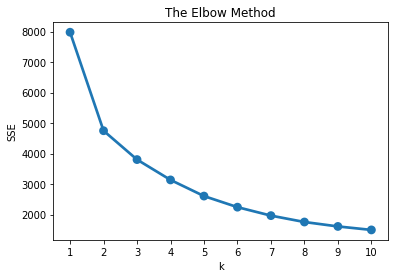

In [35]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [36]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(2659,)

In [37]:
customers.shape

(2659, 3)

In [38]:
customers["Cluster"] = model.labels_
customers.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12347.0,40,4,161.48,1
12349.0,19,2,36.90,0
12350.0,311,1,17.70,2
12352.0,81,1,16.80,0
12356.0,246,3,126.60,2


In [39]:
customers.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          43.1       1.7          14.4   784
1          45.8       7.6         167.7   938
2         224.9       1.6          30.3   937

In [40]:
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,ID,Cluster
0,-0.436428,0.775899,1.186712,12347.0,1
1,-0.944297,-0.044405,-0.007262,12349.0,0
2,1.504485,-1.165595,-0.415229,12350.0,2
3,0.131577,-1.165595,-0.440584,12352.0,0
4,1.233877,0.466222,0.947343,12356.0,2
